### **TF-IDF: Exercises**
 
- Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.
 
- In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.
 
- For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!
 
- We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

### **About Data: Emotion Detection**

Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp


- This data consists of two columns.
        - Comment
        - Emotion
- Comment are the statements or messages regarding to a particular event/situation.

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

- As there are only 3 classes, this problem comes under the **Multi-Class Classification.**

In [15]:
import pandas as pd


#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("Emotion_classify_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [16]:
#check the distribution of Emotion
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

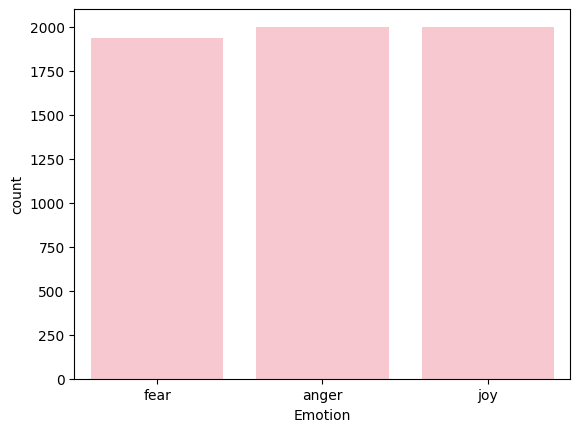

In [17]:
import seaborn as sns
sns.countplot(data = df, x = 'Emotion', color = 'pink')

- From the above, we can see that almost the Emotions(classes) occured equal number of times and balanced. There is **no problem of class imbalance** and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [18]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions

df['Emotion_num'] = df['Emotion'].map({'joy' : 0, 'fear': 1, 'anger': 2})

#checking the results 
df.head(5)

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1


### **Modelling without Pre-processing Text data**

In [19]:
#Do the 'train-test' splitting with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

In [20]:
#print the shapes

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4749,)
Shape of X_test:  (1188,)



**Attempt 1** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [21]:
#1. create a pipeline object

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36       400
           1       0.36      0.79      0.50       388
           2       0.51      0.21      0.30       400

    accuracy                           0.42      1188
   macro avg       0.48      0.42      0.38      1188
weighted avg       0.49      0.42      0.38      1188




**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.


In [22]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [23]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       400
           1       0.95      0.89      0.92       388
           2       0.94      0.86      0.90       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using **TF-IDF vectorizer** for pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       400
           1       0.91      0.90      0.91       388
           2       0.94      0.86      0.90       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [25]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [26]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment'] = df['Comment'].apply(preprocess) 

**Build a model with pre processed text**

In [27]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using CountVectorizer with both unigrams and bigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [28]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.94      0.92      0.93       388
           2       0.92      0.94      0.93       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188




**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using **TF-IDF vectorizer** for pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.


In [29]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       400
           1       0.93      0.92      0.93       388
           2       0.93      0.91      0.92       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



## **Final Observations**

- As part of this exercise we have trained the data with algorithms like **Multinomial Naive Bayes** and **Random Forest** which are most used and provide good results for text related problems.

- As Machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training. For this purpose, we have used Bag of words(unigrams, bigrams, n-grams) and TF-IDF text representation techniques.


**Key Findings**

- As the n_gram range keeps increasing, there's drastic fall of improvement in performance metrics.

- There's seen a significant improvement in results before pre-processing and after pre-processing the data.

- TF-IDF and Bag of words both performed equally well in performance metrics like Recall and F1-score.

- Random Forest performed quite well when compared to Multinomial Naive Bayes.

**Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.**
